### Import Packages

In [1]:
import altair as alt
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from zipCode import zipcodeLatLon

### Import datasets
Import EV charging dataset of Palo Alto in California from 2010 to 2020

In [2]:
EVdf0 = pd.read_csv("EVChargingData2010_2020.csv", low_memory=False)

### Inspect data

In [3]:
pd.set_option('display.max_columns', None)
EVdf0.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.0,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.0,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN


In [4]:
## Show column information
print("What is the column information?\n")
EVdf0.info(verbose=True, show_counts=True)

What is the column information?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                

In [5]:
## Descriptive statistics about the data
print("What is the descriptive statistics about the data?\n")
EVdf0.describe()

What is the descriptive statistics about the data?



,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


In [6]:
print("How many columns and rows are in the dataset?\n")
print(f"Rows = {EVdf0.shape[0]}\nColumns = {EVdf0.shape[1]}")

How many columns and rows are in the dataset?

Rows = 259415
Columns = 33


In [7]:
print("What about the data types?\n")
display(EVdf0.dtypes)
print("============")
display(EVdf0.dtypes.value_counts())

What about the data types?



Station Name                        object
MAC Address                         object
Org Name                            object
Start Date                          object
Start Time Zone                     object
End Date                            object
End Time Zone                       object
Transaction Date (Pacific Time)     object
Total Duration (hh:mm:ss)           object
Charging Time (hh:mm:ss)            object
Energy (kWh)                       float64
GHG Savings (kg)                   float64
Gasoline Savings (gallons)         float64
Port Type                           object
Port Number                          int64
Plug Type                           object
EVSE ID                            float64
Address 1                           object
City                                object
State/Province                      object
Postal Code                          int64
Country                             object
Latitude                           float64
Longitude  

object     21
float64     9
int64       3
Name: count, dtype: int64

In [8]:
print("Are there duplicate rows?\n")

print(
    EVdf0.duplicated()
    .value_counts()
    .to_string()
    .replace("False", "Unique")
    .replace("True", "Duplicated")
)
print()

Are there duplicate rows?

Unique    259411
Duplicated          4



In [9]:
print("Are there NaNs/Nulls in any columns?\n")
column_null_counts = EVdf0.isnull().sum()
column_null_counts_filtered = column_null_counts[column_null_counts > 0]
print(column_null_counts_filtered.to_string())

Are there NaNs/Nulls in any columns?

Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948


In [10]:
print("Count NaNs/Nulls in all columns\n")
print(EVdf0[EVdf0 == np.inf].count())

Count NaNs/Nulls in all columns

Station Name                       0
MAC Address                        0
Org Name                           0
Start Date                         0
Start Time Zone                    0
End Date                           0
End Time Zone                      0
Transaction Date (Pacific Time)    0
Total Duration (hh:mm:ss)          0
Charging Time (hh:mm:ss)           0
Energy (kWh)                       0
GHG Savings (kg)                   0
Gasoline Savings (gallons)         0
Port Type                          0
Port Number                        0
Plug Type                          0
EVSE ID                            0
Address 1                          0
City                               0
State/Province                     0
Postal Code                        0
Country                            0
Latitude                           0
Longitude                          0
Currency                           0
Fee                                0
Ended

### Data processing

In [11]:
print("Delete missing data\n")
EVdf0 = EVdf0.dropna(axis=0)

Delete missing data



In [12]:
print("Delete duplicated rows\n")
EVdf0 = EVdf0.drop_duplicates()

Delete duplicated rows



### Descriptive analysis

#### How many unique charging stations are there in Palo Alto between 2010 to 2020?

In [13]:
EVdf1 = EVdf0.copy()
EVdf1["StartDate"] = pd.to_datetime(EVdf1["Start Date"]).dt.date
EVdf1["StartYear"] = pd.to_datetime(EVdf1["Start Date"]).dt.year
EVdf1["StartMonth"] = pd.to_datetime(EVdf1["Start Date"]).dt.month
EVdf1["StartDayofWeek"] = pd.to_datetime(EVdf1["Start Date"]).dt.day_name()
EVdf1["StartIsWeekend"] = EVdf1["StartDayofWeek"].isin(["Saturday", "Sunday"])
EVdf1["StartIsWeekend"] = EVdf1["StartIsWeekend"].replace(
    {True: "Weekend", False: "Weekday"}
)

In [14]:
EVdf1.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,StartDate,StartYear,StartMonth,StartDayofWeek,StartIsWeekend
78948,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,8/1/2016 5:21,PDT,8/1/2016 6:49,PDT,8/1/2016 6:49,1:27:58,1:25:26,4.464626,1.875,0.560,Level 2,1,J1772,109701.0,400 Cambridge Ave,Palo Alto,California,94306,United States,37.426155,-122.146065,USD,0.0,Plug Out at Vehicle,1665,94587.0,523487,Santa Clara County,1.427410e+11,CT4020-HD-GW,2016-08-01,2016,8,Monday,Weekday
78949,PALO ALTO CA / CAMBRIDGE #2,0024:B100:0002:13B7,City of Palo Alto,8/1/2016 6:01,PDT,8/1/2016 10:58,PDT,8/1/2016 10:58,4:56:27,2:31:04,7.501231,3.151,0.941,Level 2,1,J1772,107427.0,400 Cambridge Ave,Palo Alto,California,94306,United States,37.426182,-122.146065,USD,0.0,Plug Out at Vehicle,1771,95030.0,141845,Santa Clara County,1.428410e+11,CT4020-HD-GW,2016-08-01,2016,8,Monday,Weekday
78950,PALO ALTO CA / CAMBRIDGE #1,0024:B100:0002:1329,City of Palo Alto,8/1/2016 6:03,PDT,8/1/2016 9:15,PDT,8/1/2016 9:15,3:12:17,3:11:18,10.891753,4.575,1.367,Level 2,2,J1772,109701.0,400 Cambridge Ave,Palo Alto,California,94306,United States,37.426155,-122.146065,USD,0.0,Plug Out at Vehicle,1666,80525.0,203603,Santa Clara County,1.427410e+11,CT4020-HD-GW,2016-08-01,2016,8,Monday,Weekday
78951,PALO ALTO CA / HAMILTON #2,0024:B100:0002:1331,City of Palo Alto,8/1/2016 6:10,PDT,8/1/2016 8:54,PDT,8/1/2016 8:54,2:44:25,2:25:49,6.968250,2.927,0.875,Level 2,1,J1772,109785.0,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444359,-122.159904,USD,0.0,Plug Out at Vehicle,2093,94539.0,126575,Santa Clara County,1.427410e+11,CT4020-HD-GW,2016-08-01,2016,8,Monday,Weekday
78952,PALO ALTO CA / HIGH #1,0024:B100:0002:10FE,City of Palo Alto,8/1/2016 6:13,PDT,8/1/2016 9:33,PDT,8/1/2016 9:33,3:19:24,3:19:15,17.938757,7.534,2.251,Level 2,1,J1772,104339.0,528 High St,Palo Alto,California,94301,United States,37.443558,-122.162849,USD,0.0,Plug Out at Vehicle,3112,94024.0,191743,Santa Clara County,1.422410e+11,CT4020-HD-GW,2016-08-01,2016,8,Monday,Weekday


In [15]:
df_zipcode_latlon = zipcodeLatLon()

EVdf1["DriverLat"] = EVdf1["Driver Postal Code"].map(
    df_zipcode_latlon.set_index("zipcode")["lat"]
)
EVdf1["DriverLon"] = EVdf1["Driver Postal Code"].map(
    df_zipcode_latlon.set_index("zipcode")["lon"]
)

,1,2,3,4,9,10
0,99553,Akutan,Alaska,AK,54.1430,-165.7854
1,99571,Cold Bay,Alaska,AK,55.1858,-162.7211
2,99583,False Pass,Alaska,AK,54.8542,-163.4113
3,99612,King Cove,Alaska,AK,55.0628,-162.3056
4,99661,Sand Point,Alaska,AK,55.3192,-160.4914
...,...,...,...,...,...,...
41478,96558,APO AA,NaN,NaN,19.7542,-155.5858
41479,96598,FPO AA,NaN,NaN,-89.9976,139.2729
41480,96599,FPO AA,NaN,NaN,-77.8460,166.6760
41481,96860,FPO AA,NaN,NaN,21.3448,-157.9774


In [16]:
EVdf1['Station Name'].unique()

array(['PALO ALTO CA / CAMBRIDGE #1', 'PALO ALTO CA / CAMBRIDGE #2',
       'PALO ALTO CA / HAMILTON #2', 'PALO ALTO CA / HIGH #1',
       'PALO ALTO CA / HAMILTON #1', 'PALO ALTO CA / TED THOMPSON #1',
       'PALO ALTO CA / BRYANT #2', 'PALO ALTO CA / WEBSTER #2',
       'PALO ALTO CA / HIGH #4', 'PALO ALTO CA / WEBSTER #3',
       'PALO ALTO CA / MPL #6', 'PALO ALTO CA / BRYANT #3',
       'PALO ALTO CA / MPL #4', 'PALO ALTO CA / MPL #5',
       'PALO ALTO CA / BRYANT #1', 'PALO ALTO CA / RINCONADA LIB 1',
       'PALO ALTO CA / WEBSTER #1', 'PALO ALTO CA / RINCONADA LIB 3',
       'PALO ALTO CA / RINCONADA LIB 2', 'PALO ALTO CA / MPL #3',
       'PALO ALTO CA / MPL #2', 'PALO ALTO CA / MPL #1',
       'PALO ALTO CA / HIGH #2', 'PALO ALTO CA / HIGH #3',
       'PALO ALTO CA / BRYANT #6', 'PALO ALTO CA / BRYANT #4',
       'PALO ALTO CA / BRYANT #5', 'PALO ALTO CA / TED THOMPSON #4',
       'PALO ALTO CA / CAMBRIDGE #5', 'PALO ALTO CA / CAMBRIDGE #3',
       'PALO ALTO CA / CAMBRIDGE

In [17]:
ChargingStations = EVdf1[["Station Name", "Latitude", "Longitude", "StartYear"]]
ChargingStations = ChargingStations.drop_duplicates().reset_index(drop=True)
NumChargingStations = (
    ChargingStations.groupby("StartYear")
    .size()
    .reset_index()
    .reset_index(drop=True)
)
NumChargingStations.columns = ["Year", "Number of Charging stations"]
display(NumChargingStations)

,Year,Number of Charging stations
0,2016,22
1,2017,34
2,2018,31
3,2019,33
4,2020,47


#### How do charging stations in Palo Alto distribute in space?

In [18]:
import folium

In [19]:
StationLocation = EVdf1[["Station Name", "Latitude", "Longitude", "StartYear"]]

# Unique chargins stations
StationLocation = StationLocation.drop_duplicates().reset_index(drop=True)

# Get unique customer zipcodes and filter df_zipcode_latlon based on this list
# to show how far the customers are away from the charging stations
unique_customer_zipcodes = df_zipcode_latlon[
    df_zipcode_latlon["zipcode"].isin(EVdf1["Driver Postal Code"].unique())
][["zipcode", "lat", "lon"]]

f = folium.Figure(width=600, height=400)
m = folium.Map(tiles="cartodbpositron")
for stationname, lat, lon in zip(
    StationLocation["Station Name"],
    StationLocation["Latitude"],
    StationLocation["Longitude"],
):
    c = folium.Marker(
        [lat, lon], popup=stationname, icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(m)

for driverzip, lat, lon in zip(
    unique_customer_zipcodes["zipcode"],
    unique_customer_zipcodes["lat"],
    unique_customer_zipcodes["lon"],
):
    c = folium.CircleMarker([lat, lon], popup=driverzip, radius=3).add_to(m)

folium.LayerControl().add_to(m)
f.add_child(m)
m.fit_bounds(m.get_bounds(), padding=(50, 50))
m

#### How does the number of unique users change between 2010 to 2020?

In [20]:
ChargingUsers = EVdf1[["User ID", "StartYear"]]
ChargingUsers = ChargingUsers.drop_duplicates().reset_index(drop=True)
NumChargingUsers = (
    ChargingUsers.groupby("StartYear")
    .size()
    .reset_index()
    .reset_index(drop=True)
)
NumChargingUsers.columns = ["Year", "Number of Users"]
display(NumChargingUsers)

,Year,Number of Users
0,2016,2923
1,2017,5830
2,2018,7301
3,2019,8088
4,2020,3847


#### How does the spatial distribution of unique users change between 2010 to 2020?

#### What is the service area of each charging station?

#### What is the dictribution of individual energy comsumption between charging among between 2010 to 2020?

In [21]:
EnergyIndividualCharging = EVdf1[["User ID", "Energy (kWh)", "StartYear", "Port Type"]]
EnergyIndividualCharging = EnergyIndividualCharging.drop_duplicates().reset_index(drop=True)
SumEnergyIndividualCharging = (
    EnergyIndividualCharging.groupby(["StartYear", "User ID", "Port Type"]).agg({'Energy (kWh)':'sum'})
    .reset_index()
    .reset_index(drop=True)
)
display(SumEnergyIndividualCharging.head(10))

,StartYear,User ID,Port Type,Energy (kWh)
0,2016,10013,Level 2,2.263000
1,2016,100243,Level 2,728.203586
2,2016,101603,Level 2,13.740003
3,2016,102333,Level 2,760.904601
4,2016,10293,Level 2,37.934352
5,2016,103873,Level 2,0.887328
6,2016,104811,Level 2,3.598608
7,2016,105053,Level 2,10.761850
8,2016,105363,Level 2,5.096100
9,2016,106403,Level 2,4.877000


In [22]:
len(SumEnergyIndividualCharging)

28161

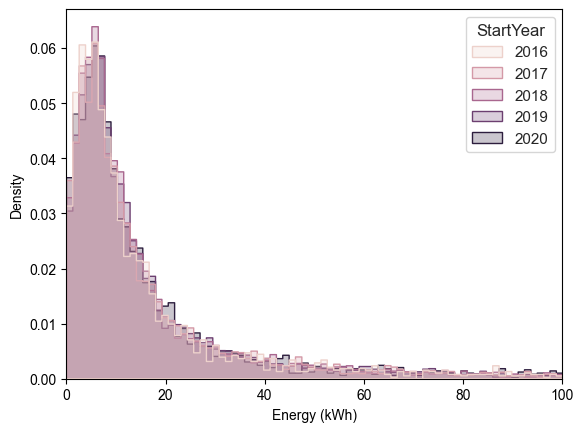

In [23]:
fig, ax = plt.subplots()
sns.set_theme(style="ticks", palette="pastel")
sns.histplot(
    SumEnergyIndividualCharging, x="Energy (kWh)", hue="StartYear", element="step",
    stat="density", common_norm=False,
)
ax.set_xlim(0,100)
plt.show()

#### How does the energy consumption of each charging station change between 2010 to 2020 (yearly, monthly, weekly, daily)?

##### Yearly change

In [60]:
### Yearly change
EnergyChargingStations = EVdf1[["Station Name", "Energy (kWh)", "StartDate", "Fee"]]
EnergyChargingStations = EnergyChargingStations.drop_duplicates().reset_index(drop=True)
SumEnergyChargingStations = (
    EnergyChargingStations.groupby(["StartDate", "Station Name"]).agg({'Energy (kWh)':'sum', 'Fee': 'sum'})
    .reset_index()
    .reset_index(drop=True)
)
display(SumEnergyChargingStations.head(10))

,StartDate,Station Name,Energy (kWh),Fee
0,2016-08-01,PALO ALTO CA / BRYANT #1,65.935780,0.0
1,2016-08-01,PALO ALTO CA / BRYANT #2,62.881228,0.0
2,2016-08-01,PALO ALTO CA / BRYANT #3,38.870160,0.0
3,2016-08-01,PALO ALTO CA / CAMBRIDGE #1,86.989137,0.0
4,2016-08-01,PALO ALTO CA / CAMBRIDGE #2,74.735361,0.0
5,2016-08-01,PALO ALTO CA / HAMILTON #1,40.355306,0.0
6,2016-08-01,PALO ALTO CA / HAMILTON #2,47.996697,0.0
7,2016-08-01,PALO ALTO CA / HIGH #1,110.722450,0.0
8,2016-08-01,PALO ALTO CA / HIGH #4,44.463500,0.0
9,2016-08-01,PALO ALTO CA / MPL #2,19.822924,0.0


In [61]:
### test whetehr the calculation is correct
temp1 = EnergyChargingStations.loc[EnergyChargingStations["StartDate"] == 2016, :]
temp1 = temp1.loc[temp1["Station Name"] == "PALO ALTO CA / CAMBRIDGE #1", ["Energy (kWh)"]]
temp1.sum()

Energy (kWh)    0.0
dtype: float64

In [62]:
Bryan = ["PALO ALTO CA / BRYANT #1", "PALO ALTO CA / BRYANT #2", "PALO ALTO CA / BRYANT #3", "PALO ALTO CA / BRYANT #4", "PALO ALTO CA / BRYANT #5"]
Cambridge = ["PALO ALTO CA / CAMBRIDGE #1", "PALO ALTO CA / CAMBRIDGE #2", "PALO ALTO CA / CAMBRIDGE #3", "PALO ALTO CA / CAMBRIDGE #4", "PALO ALTO CA / CAMBRIDGE #5"]
testData = SumEnergyChargingStations[SumEnergyChargingStations["Station Name"].isin(Bryan)]

In [63]:
testData = SumEnergyChargingStations[SumEnergyChargingStations["Station Name"] == "PALO ALTO CA / HIGH #1"]
display(testData)

,StartDate,Station Name,Energy (kWh),Fee
7,2016-08-01,PALO ALTO CA / HIGH #1,110.722450,0.00
28,2016-08-02,PALO ALTO CA / HIGH #1,119.701479,0.00
50,2016-08-03,PALO ALTO CA / HIGH #1,76.462270,0.00
72,2016-08-04,PALO ALTO CA / HIGH #1,105.516004,0.00
92,2016-08-05,PALO ALTO CA / HIGH #1,72.123180,0.00
...,...,...,...,...
37793,2020-12-24,PALO ALTO CA / HIGH #1,57.215000,15.95
37801,2020-12-25,PALO ALTO CA / HIGH #1,10.072000,2.32
37838,2020-12-28,PALO ALTO CA / HIGH #1,10.488000,2.42
37853,2020-12-29,PALO ALTO CA / HIGH #1,52.039000,18.44


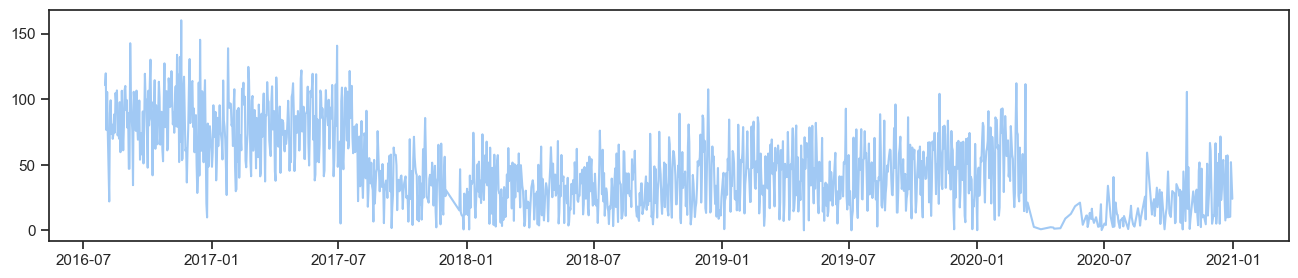

In [64]:
plt.figure(figsize=(16,3))
plt.plot(testData['StartDate'], testData['Energy (kWh)'])

### Modeling: EV charging demand

### Prepare Data

In [91]:
from sklearn.model_selection import train_test_split
import tqdm

In [66]:
testData = SumEnergyChargingStations.loc[(SumEnergyChargingStations["Station Name"] == "PALO ALTO CA / HIGH #1"), ["StartDate", "Energy (kWh)", "Fee"]]

In [67]:
testData.head()

,StartDate,Energy (kWh),Fee
7,2016-08-01,110.722450,0.0
28,2016-08-02,119.701479,0.0
50,2016-08-03,76.462270,0.0
72,2016-08-04,105.516004,0.0
92,2016-08-05,72.123180,0.0


### Convoluntional neural network

### Long short term memory (LSTM)

In [30]:
testData = SumEnergyChargingStations.loc[(SumEnergyChargingStations["Station Name"] == "PALO ALTO CA / HIGH #1"), ["StartDate", "Energy (kWh)"]]

# Convert the 'datetime' column to a datetime object
testData['StartDate'] = pd.to_datetime(testData['StartDate'])

# Set the 'datetime' column as the index
testData.set_index('StartDate', inplace=True)

# # Resample the data to hourly intervals and fill missing values with the previous value
testData = testData.resample('D').ffill()

# # Normalize the data
testData = (testData - testData.mean()) / testData.std()

# # Convert the DataFrame to a numpy array
data = testData.values

#### Step 3: Split the data
Next, we'll split the data into training and testing sets. We'll use the first 70% of the data for training and the remaining 30% for testing.

In [31]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.7)
train_data, test_data = data[:train_size], data[train_size:]

#### Step 4: Create Data Sequences

In [32]:
# Function to create sequences of data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences for training and testing data
seq_length = 30
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

#### Step 5: Create LSTM Model

In [38]:
import torch
import torch.nn as nn

In [39]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

#### Step 6: Instantiate Model and Define Loss Function and Optimizer

In [1]:
X_train.shape

NameError: name 'X_train' is not defined

In [41]:
# Instantiate the model
input_size = X_train.shape[2]
hidden_size = 32
output_size = 1
model = LSTM(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#### Step 7: Train the Model

In [42]:
# Convert numpy arrays to Pytorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Define the batch size and number of epochs
batch_size = 32
num_epochs = 25

# Train the model
for epoch in range(num_epochs):
    # Shuffle the training data
    perm = torch.randperm(X_train.shape[0])
    X_train = X_train[perm]
    y_train = y_train[perm]

    # Loop over batches
    for i in range(0, X_train.shape[0], batch_size):
        # Get batch
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Print loss for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/25], Loss: 0.5054
Epoch [2/25], Loss: 0.5751
Epoch [3/25], Loss: 0.3223
Epoch [4/25], Loss: 0.7925
Epoch [5/25], Loss: 0.4966
Epoch [6/25], Loss: 0.2037
Epoch [7/25], Loss: 0.4312
Epoch [8/25], Loss: 0.1710
Epoch [9/25], Loss: 0.6877
Epoch [10/25], Loss: 0.3191
Epoch [11/25], Loss: 0.5192
Epoch [12/25], Loss: 1.0972
Epoch [13/25], Loss: 0.3301
Epoch [14/25], Loss: 0.4073
Epoch [15/25], Loss: 1.1761
Epoch [16/25], Loss: 0.5298
Epoch [17/25], Loss: 0.4213
Epoch [18/25], Loss: 0.7678
Epoch [19/25], Loss: 0.3564
Epoch [20/25], Loss: 0.5467
Epoch [21/25], Loss: 0.2486
Epoch [22/25], Loss: 0.5281
Epoch [23/25], Loss: 0.3584
Epoch [24/25], Loss: 0.2295
Epoch [25/25], Loss: 0.8439


#### Step 8: Evaluate the Model

In [43]:
# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Calculate the test loss
test_loss = criterion(y_pred, y_test)
print('Test Loss: {:.4f}'.format(test_loss.item()))

Test Loss: 0.4926


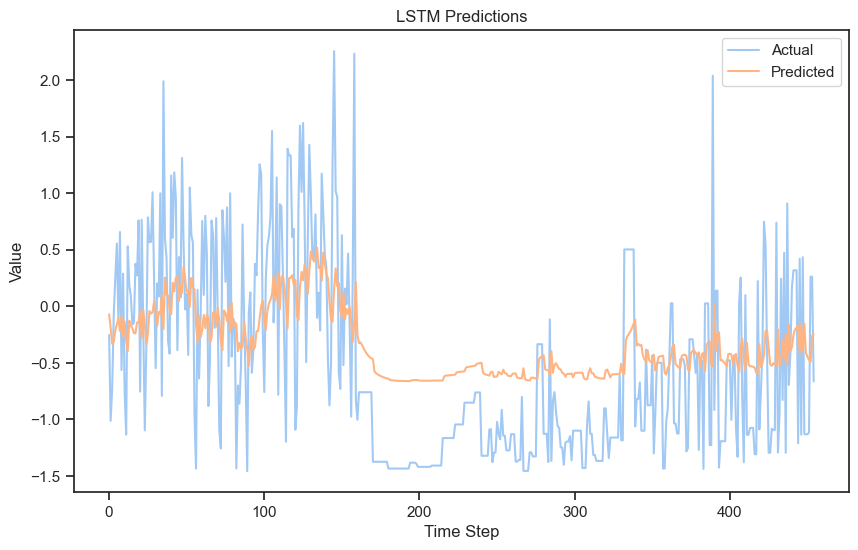

In [44]:
import matplotlib.pyplot as plt

# Convert Pytorch tensors to numpy arrays
y_test = y_test.numpy()
y_pred = y_pred.numpy()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:500], label='Actual')
plt.plot(y_pred[:500], label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('LSTM Predictions')
plt.legend()
plt.show()

### GRU

### Transformer

### Thoughts
- the relationship between the EV charging station and the grid
- Short term or long term?
- Assumption: every station is independent